In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Transform xml data into pandas dataframe

In [0]:
import xml.sax
import xml.etree.ElementTree as ET
import pandas

In [2]:
class GroupHandler(xml.sax.ContentHandler):
    def __init__(self):
      self.data = {'Id':[],
              'Score':[],
              'FavoriteCount':[],
              'ViewCount':[],
              'AnswerCount':[],
              'CommentCount':[]}

      self.temporaryContent =['Id','Score','FavoriteCount','ViewCount',
                              'AnswerCount','CommentCount']


      self.inTags = False
      self.currentTag = ""
      self.currentNumber = 0


    def startElement(self, name, attrs):
        if name == "Tags":
            self.inTags = True
        if not self.inTags:
          self.currentTag = name
          

    def characters(self, content):
        if not self.inTags:
            if self.currentNumber == 0:
                if self.currentTag == 'Id':
                    self.temporaryContent[0] =(content)
                    self.currentNumber = 1
                else:
                    self.currentNumber = 0
            elif self.currentNumber == 1:
                if self.currentTag == "Score":
                    self.temporaryContent[1] =(content)
                    self.currentNumber = 2
                else:
                    self.currentNumber = 0
            elif self.currentNumber == 2:
                if self.currentTag == "FavoriteCount":
                    self.temporaryContent[2] =(content)
                    self.currentNumber = 3
                else:
                    self.currentNumber = 0
            elif self.currentNumber == 3:
                if self.currentTag == "ViewCount":
                    self.temporaryContent[3] =(content)
                    self.currentNumber = 4
                else:
                    self.currentNumber = 0
            elif self.currentNumber == 4:
                if self.currentTag == "AnswerCount":
                    self.temporaryContent[4] =(content)
                    self.currentNumber = 5
                else:
                    self.currentNumber = 0
            elif self.currentNumber == 5:
                if self.currentTag == "CommentCount":
                    self.temporaryContent[5] =(content)
                    self.currentNumber = 6
                else:
                    self.currentNumber = 0
            
            if self.currentNumber == 6:
                self.data["Id"].append(self.temporaryContent[0])
                self.data["Score"].append(self.temporaryContent[1]) 
                self.data["FavoriteCount"].append(self.temporaryContent[2]) 
                self.data["ViewCount"].append(self.temporaryContent[3]) 
                self.data["AnswerCount"].append(self.temporaryContent[4])  
                self.data["CommentCount"].append(self.temporaryContent[5]) 
                self.currentNumber = 0


    def endElement(self,name):
        if self.inTags and name == "Tags":
          self.inTags = False

frames = []
for i in range(1):
    handler = GroupHandler()
    parser = xml.sax.make_parser()
    parser.setContentHandler(handler)
    parser.parse('drive/My Drive/onlab/Data_' + str(i+1) + '.xml')
    frames.append(pandas.DataFrame(handler.data))
# print()

# print(list(map( lambda key: (key,len(handler.data[key])),handler.data.keys())))

# Create DataFrame
# dataFrame = pandas.DataFrame(handler.data)
#print(handler.data)
dataFrame = pandas.concat(frames)
# Print the output.
print(dataFrame)

             Id Score FavoriteCount ViewCount AnswerCount CommentCount
0             4   645            49     45103          13            3
1             6   290            11     18713           6            0
2             9  1754           438    574705          61            5
3            11  1461           537    152779          37            3
4            13   597           147    182042          24           10
...         ...   ...           ...       ...         ...          ...
999861  4234765     1             0      2151           3            0
999862  4234767     0             1      1358           1            0
999863  4234769     1             0      1971           3            3
999864  4234771     0             0       912           2            1
999865  4234774     2             0       557           2            7

[999866 rows x 6 columns]


In [0]:
truncatedDataFrame = dataFrame.truncate(after=19999)
truncatedDataFrame.drop(columns=['Score', 'FavoriteCount', 'ViewCount', 'AnswerCount', 'CommentCount'])
truncatedDataFrame.to_csv('id.csv', sep =';')

# Normalizing Data

In [4]:
from sklearn.preprocessing import MinMaxScaler

normalizedDataFrame = truncatedDataFrame
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(normalizedDataFrame) 
normalizedDataFrame.loc[:,:] = scaled_values
print(normalizedDataFrame)

             Id     Score  FavoriteCount  ViewCount  AnswerCount  CommentCount
0      0.000000  0.083015       0.006770   0.011673     0.043919      0.090909
1      0.000012  0.037815       0.001520   0.004834     0.020270      0.000000
2      0.000030  0.224217       0.060514   0.148933     0.206081      0.151515
3      0.000041  0.186911       0.074192   0.039580     0.125000      0.090909
4      0.000053  0.076903       0.020309   0.047165     0.081081      0.303030
...         ...       ...            ...        ...          ...           ...
19995  0.999823  0.001019       0.000138   0.000441     0.013514      0.000000
19996  0.999870  0.009804       0.002072   0.012162     0.060811      0.333333
19997  0.999911  0.001273       0.000138   0.000105     0.010135      0.000000
19998  0.999953  0.001146       0.000000   0.000079     0.010135      0.000000
19999  1.000000  0.003947       0.001105   0.000688     0.020270      0.090909

[20000 rows x 6 columns]


In [0]:
# from sklearn.preprocessing import StandardScaler

# standardisedDataFrame = dataFrame
# scaler = StandardScaler() 
# scaled_values = scaler.fit_transform(dataFrame) 
# standardisedDataFrame.loc[:,:] = scaled_values
# print(standardisedDataFrame)

Create training and validation sets

In [6]:
dataset=normalizedDataFrame.values
test_split=0.01
valid_split=0.01

inputData = dataset[:,1:6]

validation_index = int(inputData.shape[0]*(1-valid_split-test_split))
test_index = int(inputData.shape[0]*(1-test_split))

inputData_test = inputData[test_index:]
inputData_valid = inputData[validation_index:test_index]
inputData_train = inputData[:validation_index]

#print(inputData)
#print(inputData_valid)
#print(inputData_test)
print(len(inputData))
print(len(inputData_valid))
print(len(inputData_test))


20000
200
200


# Autoencoder model

Define Autoencoder model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

# Early Stopping to avoid overfitting the training data
patience=40
early_stopping=EarlyStopping(patience=patience, verbose=1)
# Save the weights
checkpointer=ModelCheckpoint(filepath="weights.hdf5", save_best_only=True, verbose =1)

# Define Model
model = Sequential()
model.add(Dense(input_dim=inputData_train.shape[1], units=5, name='encoder_1'))
model.add(Dense(units=5, name='encoder_2'))
model.add(Dense(units=4, name='encoder_3'))
model.add(Dense(units=4, name='encoder_4'))
model.add(Dense(units=3, name='bottle_neck'))
model.add(Dense(units=4, name='decoder_1'))
model.add(Dense(units=4, name='decoder_2'))
model.add(Dense(units=5, name='decoder_3'))
model.add(Dense(units=5, name='decoder_4', activation='relu'))

model.summary()


# Define Loss-function

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (Dense)            (None, 5)                 30        
_________________________________________________________________
encoder_2 (Dense)            (None, 5)                 30        
_________________________________________________________________
encoder_3 (Dense)            (None, 4)                 24        
_________________________________________________________________
encoder_4 (Dense)            (None, 4)                 20        
_________________________________________________________________
bottle_neck (Dense)          (None, 3)                 15        
_________________________________________________________________
decoder_1 (Dense)            (None, 4)                 16        
_________________________________________________________________
decoder_2 (Dense)            (None, 4)                

Training the model

In [0]:
sgd= SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov= True)
model.compile(loss='mean_absolute_error',optimizer=sgd)
model.fit (inputData_train,inputData_train,epochs=1000,
           batch_size=256,
           verbose=1,
           validation_data=(inputData_valid,inputData_valid),
           callbacks=[checkpointer,early_stopping])


Train on 8000 samples, validate on 1000 samples
Epoch 1/1000
8000/8000 [==============================] - 0s 19us/step - loss: 0.0113 - val_loss: 0.0104

Epoch 00001: val_loss improved from inf to 0.01036, saving model to weights.hdf5
Epoch 2/1000
8000/8000 [==============================] - 0s 6us/step - loss: 0.0107 - val_loss: 0.0103

Epoch 00002: val_loss improved from 0.01036 to 0.01030, saving model to weights.hdf5
Epoch 3/1000
8000/8000 [==============================] - 0s 6us/step - loss: 0.0106 - val_loss: 0.0103

Epoch 00003: val_loss improved from 0.01030 to 0.01025, saving model to weights.hdf5
Epoch 4/1000
8000/8000 [==============================] - 0s 6us/step - loss: 0.0106 - val_loss: 0.0103

Epoch 00004: val_loss did not improve from 0.01025
Epoch 5/1000
8000/8000 [==============================] - 0s 7us/step - loss: 0.0106 - val_loss: 0.0102

Epoch 00005: val_loss improved from 0.01025 to 0.01025, saving model to weights.hdf5
Epoch 6/1000
8000/8000 [===============

Testing the trained model

In [0]:
# Test the model
from keras.models import load_model
from sklearn.metrics import mean_absolute_error

model = load_model("weights.hdf5")

preds= model.predict(inputData_test)
test_err = mean_absolute_error(inputData_test, preds)
print("\nTeszt hiba: %f " % (test_err))


Teszt hiba: 0.007445 


In [0]:
print(inputData_test)
print('----------------------------------------')
print(preds)

[[2.29182582e-03 6.90798563e-04 3.27523769e-03 3.04054054e-02
  0.00000000e+00]
 [1.14591291e-03 0.00000000e+00 6.11184187e-04 3.04054054e-02
  0.00000000e+00]
 [1.01858925e-03 1.38159713e-04 4.98838105e-04 6.75675676e-03
  0.00000000e+00]
 ...
 [2.16450216e-03 6.90798563e-04 6.90740264e-03 3.37837838e-02
  0.00000000e+00]
 [1.14591291e-03 0.00000000e+00 4.78411545e-05 3.37837838e-03
  0.00000000e+00]
 [5.09294627e-03 3.03951368e-03 4.50674426e-03 2.36486486e-02
  0.00000000e+00]]
----------------------------------------
[[0.00153862 0.         0.         0.01848125 0.0022754 ]
 [0.00134169 0.         0.         0.01820962 0.0013862 ]
 [0.0012732  0.         0.         0.0115186  0.        ]
 ...
 [0.00151839 0.         0.         0.01985406 0.00421587]
 [0.00126474 0.         0.         0.01052085 0.        ]
 [0.00209511 0.         0.         0.01659395 0.0009389 ]]


After training is finished get the encoding model

In [0]:
trained_model = Sequential()
trained_model.add(Dense(input_dim=inputData.shape[1], units=5, name='encoder_1'))
trained_model.add(Dense(units=5, name='encoder_2'))
trained_model.add(Dense(units=4, name='encoder_3'))
trained_model.add(Dense(units=4, name='encoder_4'))
trained_model.add(Dense(units=3, name='bottle_neck'))

trained_model.load_weights("weights.hdf5", by_name=True)

trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (Dense)            (None, 5)                 30        
_________________________________________________________________
encoder_2 (Dense)            (None, 5)                 30        
_________________________________________________________________
encoder_3 (Dense)            (None, 4)                 24        
_________________________________________________________________
encoder_4 (Dense)            (None, 4)                 20        
_________________________________________________________________
bottle_neck (Dense)          (None, 3)                 15        
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


# Umap and hierachical clustering

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import umap

In [8]:
reducer = umap.UMAP(n_neighbors = 15, random_state=42, low_memory = True, n_epochs = 200 )
reducer.fit(inputData)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=200,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [9]:
embedding = reducer.transform(inputData)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(20000, 2)

Text(0.5, 1.0, 'UMAP projection of the posts')

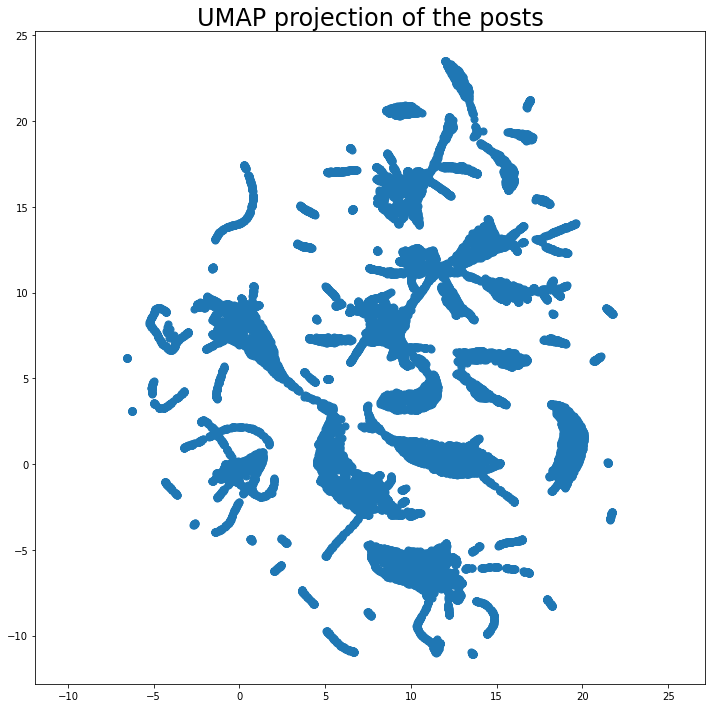

In [10]:
plt.rcParams["figure.figsize"] = [12,12]
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the posts', fontsize=24)

In [0]:
embedding.tofile("embedding.csv", sep=";")

In [12]:
print(embedding)

[[14.295098  10.845583 ]
 [ 8.790707   7.398902 ]
 [11.171342  11.95183  ]
 ...
 [12.988554  -6.953514 ]
 [18.056952  -8.040643 ]
 [17.087534  10.1785555]]


In [13]:
import gc
gc.collect()

22184

Creating the hiearchical clustering

In [14]:
import scipy.cluster.hierarchy as shc
linkage = shc.linkage(inputData, method='ward')
print(linkage.shape)
print(linkage)

(19999, 4)
[[1.64640000e+04 1.67690000e+04 0.00000000e+00 2.00000000e+00]
 [6.69100000e+03 8.37200000e+03 0.00000000e+00 2.00000000e+00]
 [1.78980000e+04 1.82160000e+04 0.00000000e+00 2.00000000e+00]
 ...
 [3.99940000e+04 3.99950000e+04 4.28218573e+00 3.48700000e+03]
 [3.99930000e+04 3.99960000e+04 6.96606556e+00 3.58400000e+03]
 [3.99900000e+04 3.99970000e+04 8.07319672e+00 2.00000000e+04]]


Plot the clustering as a dendogram

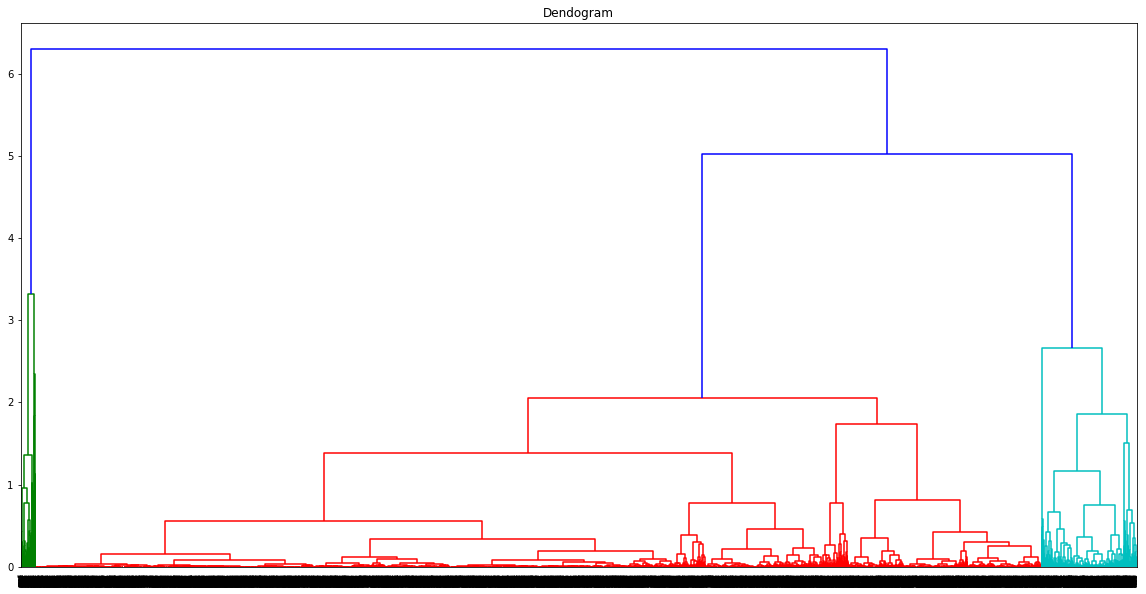

In [0]:
plt.figure(figsize=(20, 10))
plt.title("Dendogram")
dend = shc.dendrogram(linkage)

In [0]:
np.savetxt("linkage.csv", linkage, delimiter=";")

# Parse tags

In [16]:
class GroupHandler(xml.sax.ContentHandler):
    def __init__(self):
      self.data = {'Id':[],
              'Tags':[]}

      self.temporaryContent =['','','']

      self.uniqueTags = []


      self.inTags = False
      self.currentTag = ""
      self.currentNumber = 0


    def startElement(self, name, attrs):
          self.currentTag = name
          

    def characters(self, content):
         if self.currentTag == 'Id':
              self.temporaryContent[0] = (content)
         if self.currentTag == 'Name':
              if content not in self.uniqueTags:
                  self.uniqueTags.append(content)
              self.temporaryContent[1] += (content) + ','


    def endElement(self,name):
        if name == "Tags":
          self.data["Id"].append(self.temporaryContent[0])
          self.data['Tags'].append(self.temporaryContent[1])
          self.temporaryContent[1] = ''

frames = []
for i in range(1):
    handler = GroupHandler()
    parser = xml.sax.make_parser()
    parser.setContentHandler(handler)
    parser.parse('drive/My Drive/TagTest_1.xml')
    #frames.append(pandas.DataFrame(handler.data))
print()

print(list(map( lambda key: (key,len(handler.data[key])),handler.data.keys())))

# Create DataFrame
tagDataFrame = pandas.DataFrame(handler.data)
#print(handler.data)
#dataFrame = pandas.concat(frames)
# Print the output.
print(tagDataFrame)


[('Id', 100000), ('Tags', 100000)]
           Id                                               Tags
0           4  c#,floating-point,type-conversion,double,decimal,
1           6                      html,css,internet-explorer-7,
2           9                                  c#,.net,datetime,
3          11      c#,datetime,time,datediff,relative-time-span,
4          13  html,browser,timezone,user-agent,timezone-offset,
...       ...                                                ...
99995  641642                                       math,matrix,
99996  641644                    silverlight,mvvm,header,detail,
99997  641650                            cocoa-touch,core-audio,
99998  641660          c#,transactions,rollback,using-statement,
99999  641666           javascript,jquery,memory-leaks,closures,

[100000 rows x 2 columns]


In [0]:
tagDataFrame = tagDataFrame.truncate(after=19999)
tagDataFrame.to_csv('tag.csv', sep =';')

In [0]:
uniqueTagDataFrame = pandas.DataFrame(handler.uniqueTags)
uniqueTagDataFrame.to_csv('uniqueTag.csv', sep=';')